In [1]:
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [4]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
        {'kernel':['rbf'],
         'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
         'C': [0.01, 0.1, 1, 10, 100, 1000]}
    ]
    clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)
    clf.fit(X, y.values.ravel())
    print(clf.best_params_)
    return clf

X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
clf = svc_param_selection(X_train, y_train, 10)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [5]:
C_candidates = []
C_candidates.append(clf.best_params_['C']*0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C']*100)

gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma']*0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma']*100)

X = X_train
Y = y_train.values.ravel()
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)
classifiers = []

for C in C_candidates:
    for gamma in gamma_candidates:
        clt = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 101), np.linspace(0, 4, 101))
xx

array([[0.  , 0.04, 0.08, ..., 3.92, 3.96, 4.  ],
       [0.  , 0.04, 0.08, ..., 3.92, 3.96, 4.  ],
       [0.  , 0.04, 0.08, ..., 3.92, 3.96, 4.  ],
       ...,
       [0.  , 0.04, 0.08, ..., 3.92, 3.96, 4.  ],
       [0.  , 0.04, 0.08, ..., 3.92, 3.96, 4.  ],
       [0.  , 0.04, 0.08, ..., 3.92, 3.96, 4.  ]])

<Figure size 1800x1800 with 0 Axes>

C:\Users\bbong\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\bbong\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\bbong\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\bbong\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\bbong\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\bbong\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

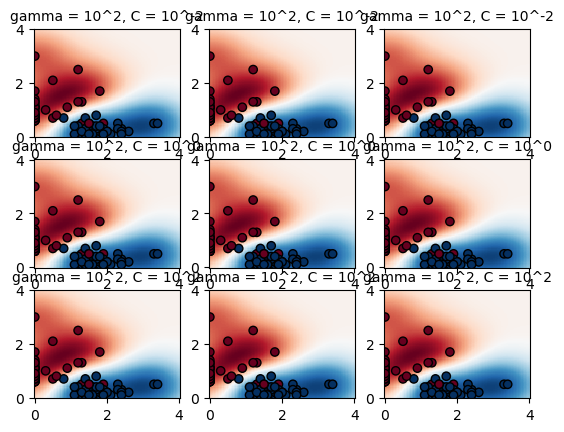

In [7]:
for (k, (C, gammam, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(len(C_candidates), len(gamma_candidates), k+1)
    plt.title("gamma = 10^%d, C = 10^%d" % (np.log10(gamma), np.log10(C)), size = 'medium')
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu, edgecolors='k')

In [8]:
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('accuracy' + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       1.00      1.00      1.00        12
          SG       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

accuracy1.0


In [9]:
comparison = pd.DataFrame({'prediction': y_pred, 'truth':y_true.values.ravel()})
comparison

,prediction,truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,C,C
7,C,C
8,SG,SG
9,C,C
